In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./data/datathon.csv')
data

,Unnamed: 0,time,refID_coin,price,marketCap,CirculatingSupply,Volume24h,Movement1h,Movement24h
0,0,2018-01-17 11:25:00,1442,10756.000000,180786170372,16807937,17884600000,-1.42,-11.40
1,1,2018-01-17 11:25:00,1443,960.930000,93242345727,97033038,7990730000,-2.37,-12.48
2,2,2018-01-17 11:25:00,1444,1.130000,43630734374,38739142811,6058320000,-3.03,-18.17
3,3,2018-01-17 11:25:00,1445,1744.130000,29504008303,16916175,1544790000,-3.20,-12.15
4,4,2018-01-17 11:25:00,1446,0.544258,14111015557,25927070538,1511130000,-2.56,-14.91
5,5,2018-01-17 11:25:00,1448,176.140000,9651298201,54793958,1353810000,-1.36,-12.67
6,6,2018-01-17 11:25:00,1447,0.887129,7984160999,8999999999,174228000,-0.79,-20.52
7,7,2018-01-17 11:25:00,1449,119.860000,7791225000,65000000,1366290000,-3.92,-21.24
8,8,2018-01-17 11:25:00,1450,0.411229,7357217335,17890803748,443714000,-1.09,-14.33
9,9,2018-01-17 11:25:00,1451,2.480000,6905187082,2779530283,245908000,-1.79,-16.55


In [3]:
data.shape

(23086419, 9)

In [6]:
data['refID_coin'].unique().shape

(1678,)

In [24]:
data = data.drop('Unnamed: 0', axis=1)

In [28]:
currencies = pd.read_csv('./data/CSVData_coin.csv')
currencies

,1442,bitcoin,Bitcoin,2018-01-15 20:40:27.557,BTC
0,1443,ethereum,Ethereum,2018-01-15 20:40:27.557,ETH
1,1444,ripple,Ripple,2018-01-15 20:40:27.557,XRP
2,1445,bitcoin-cash,Bitcoin Cash,2018-01-15 20:40:27.560,BCH
3,1446,cardano,Cardano,2018-01-15 20:40:27.560,ADA
4,1447,nem,Nem,2018-01-15 20:40:27.560,XEM
5,1448,litecoin,Litecoin,2018-01-15 20:40:27.560,LTC
6,1449,neo,Neo,2018-01-15 20:40:27.560,NEO
7,1450,stellar,Stellar,2018-01-15 20:40:27.560,XLM
8,1451,iota,Iota,2018-01-15 20:40:27.560,MIOTA
9,1452,eos,Eos,2018-01-15 20:40:27.560,EOS


In [19]:
stage_1_coins = [1442, 1445, 1456, 1446, 1453, 1447, 1452, 1443, 1457, 1451, 1460, 1448, 1454, 1447, 1449, 1444, 1450, 1474, 1455, 1465]
len(stage_1_coins)

20

In [25]:
data = data[data['refID_coin'].isin(stage_1_coins)]

In [27]:
data[:10]

,time,refID_coin,price,marketCap,CirculatingSupply,Volume24h,Movement1h,Movement24h
0,2018-01-17 11:25:00,1442,10756.000000,180786170372,16807937,17884600000,-1.42,-11.40
1,2018-01-17 11:25:00,1443,960.930000,93242345727,97033038,7990730000,-2.37,-12.48
2,2018-01-17 11:25:00,1444,1.130000,43630734374,38739142811,6058320000,-3.03,-18.17
3,2018-01-17 11:25:00,1445,1744.130000,29504008303,16916175,1544790000,-3.20,-12.15
4,2018-01-17 11:25:00,1446,0.544258,14111015557,25927070538,1511130000,-2.56,-14.91
5,2018-01-17 11:25:00,1448,176.140000,9651298201,54793958,1353810000,-1.36,-12.67
6,2018-01-17 11:25:00,1447,0.887129,7984160999,8999999999,174228000,-0.79,-20.52
7,2018-01-17 11:25:00,1449,119.860000,7791225000,65000000,1366290000,-3.92,-21.24
8,2018-01-17 11:25:00,1450,0.411229,7357217335,17890803748,443714000,-1.09,-14.33
9,2018-01-17 11:25:00,1451,2.480000,6905187082,2779530283,245908000,-1.79,-16.55


/home/vananiev/.local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


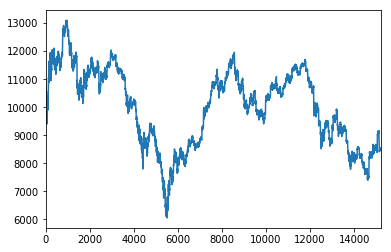

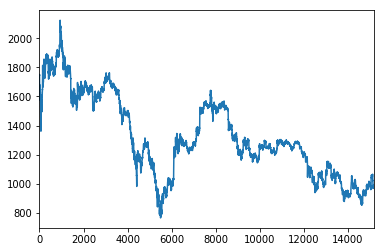

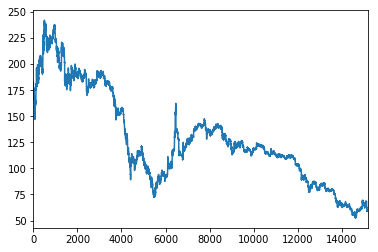

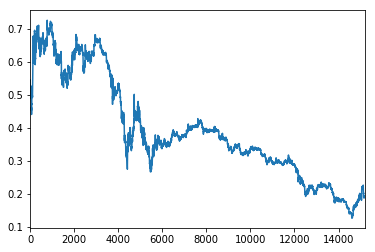

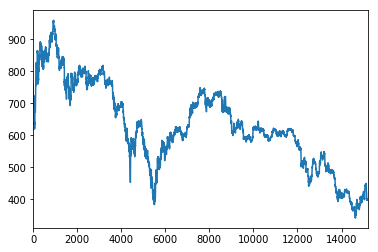

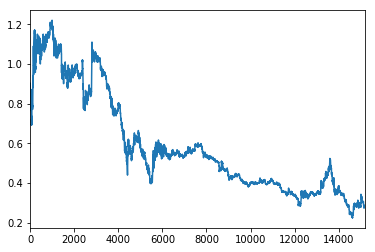

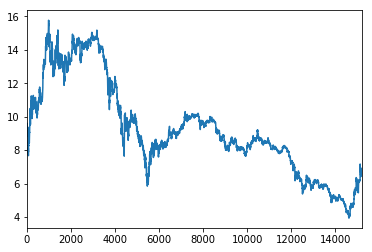

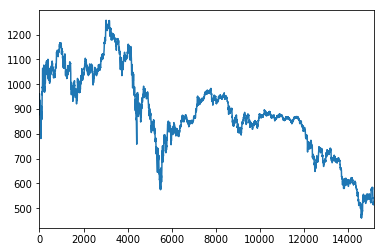

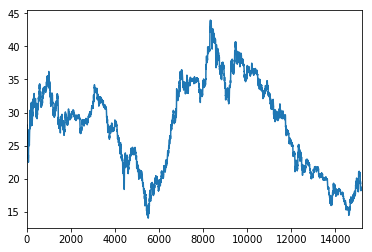

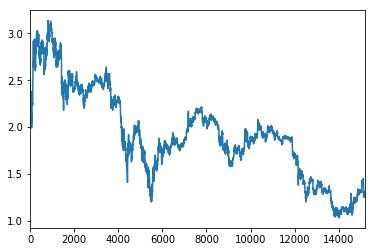

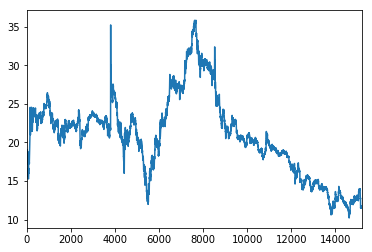

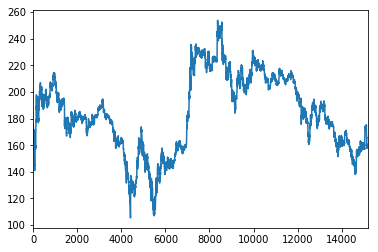

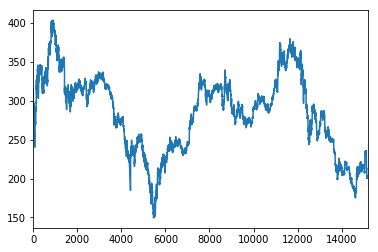

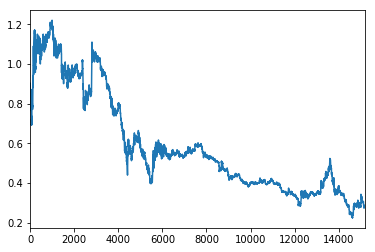

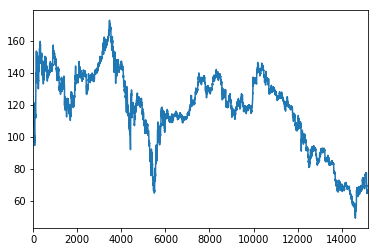

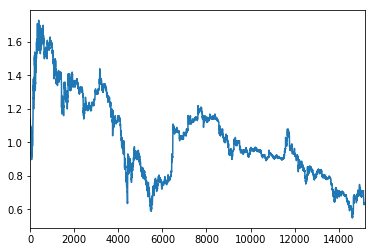

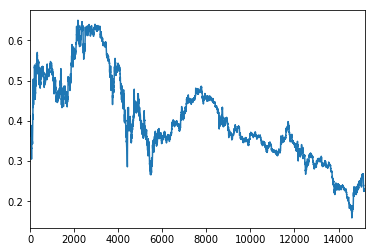

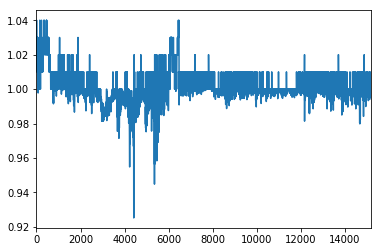

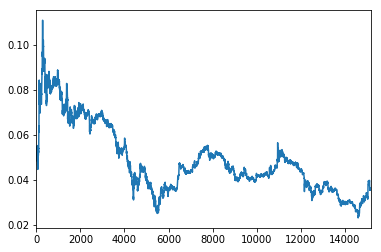

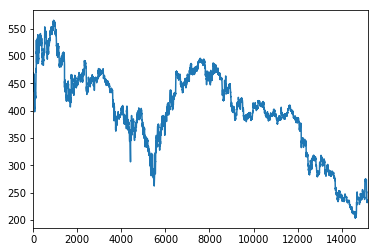

In [30]:
for coin in stage_1_coins:
    coin_prices = data[data['refID_coin'] == coin].price
    sns.tsplot(coin_prices)
    plt.show()